# Data Visualization with Matplotlib and Seaborn

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris, load_wine, load_boston
import pandas as pd

In [53]:
style = 'dark_background'
plt.style.use(style)

## Agenda

Students will be able to:

- Use the subplots syntax of `matplotlib` to create a graph
    - Line
    - Bar/hbar
    - Scatter
    - Hist
- Customize different aspects of a graph
    - labels (title, axis)
    - Linestyle 
    - Colors
- Create multiple graphs in one figure
- Use `seaborn` to create default graphs
- Use `matplotlib` to fine-tune `seaborn` graphs

There are [lots](https://python-graph-gallery.com) of different ways of plotting data! (See also [this page](https://datavizproject.com/).)

We will make heavy use of:

- bar plots;
- box plots;
- histograms;
- line plots; and
- scatter plots,

and these can all be handled by `matplotlib` and `seaborn`. These packages are great for data that exists in `pandas` DataFrames (or `numpy` arrays), and so they will often be very useful for us.

## Why Visualize Data?
or why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [2]:
# One of several libraries you will get real used to importing. 
# https://matplotlib.org/3.1.1/index.html

data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](images/iris_virginica.jpg)

## Dataframe vs Graph: Which do you prefer?

In [3]:
df_iris.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


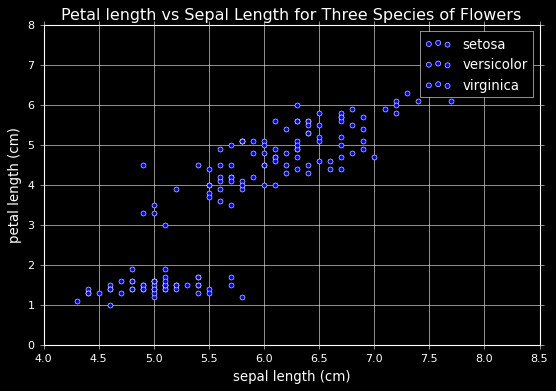

In [54]:
fig, ax = plt.subplots(figsize=(8, 5))

# Iterate through each type of flower and plot them using different colors
for flower in df_iris['target'].unique():
    subset_df = df_iris[df_iris['target'] == flower]
    x = subset_df['sepal length (cm)']
    y = subset_df['petal length (cm)']
    
    ax.scatter(x, y, label=data['target_names'][flower])

# Label your axes!
ax.set_ylabel('petal length (cm)')
ax.set_xlabel('sepal length (cm)')
ax.set_title('Petal length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

In [ ]:
# your thoughts here

# Versicolor and virginica are more similar to each other than either is to setosa.
# Versicolor and virginica tend to have long petals and sepals.
# Setosa doesn't have much spread along the y axis, or variation in petal length.
# Virginica has several outliers.
# For versicolor and virginica, petal lenght seems correlated with sepal length.

## The Effectiveness of Visualizations

- People are highly visual and can synthesize visual information such more quickly than rows and columns of numbers 
- Precognitive understanding of the data
- Visual representations can be much more viscerally persuasive 

## What Makes an Effective Visualization?

- Each graph should have a clear point it is trying to make. Understanding the insight you are trying to convey will guide the decision making process for what kind of graph will be most effective

- Know your audience! Come up with a use case and audience to pitch your visualizations

- Choosing the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
        - Red and Down tends to be negative while Green and Up is positive
        - Lighter hues are seen as lower values and darker is higher values
        - Axis start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct

## How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
        - Changing the axis scale
        - Using two different y axis scales to compare trends
        - Showing cumulative data which will always be increasing to hide a downturn in a trend
        - Pie charts (comparing degrees is not something people are good at) just use a bar chart
        - Inconsistent units
        - Not showing all of the data for motivated reasons
        - Percentages not adding up to 100

<img src="images/pie-chart-misleading.png">

image: http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/

_____



<img src="images/usa-today-2.png">

## Matplotlib

<img src="images/matplotlib_anatomy.png">

Explanation of non-obvious terms

__Figure__ - This is the "sheet of paper" all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

### Plotting Syntax

- There are many different ways to create plots but we will strongly suggest using the subplots method
    - Useful for extensibility 
    - Access to the figure and individual axis in a plot
    - More fine-grained control of customizing your plot
    - Easily create additional axis on your figure
    - Good level of abstraction
        - You can go deeper into the api but this should give you immediate access to most tools you will need for whatever plot you are making
    - Flatiron Specifc
        - Plotting code will be more easily readable for other students and instructors
        - You don’t need to remember many different ways to organize your code

Here are links to the [matplotlib documentation](https://matplotlib.org/index.html) as well as the [Axes object documentation](https://matplotlib.org/api/axes_api.html):

We will now walk through some common charts and their uses, while practicing our `matplotlib` syntax.

### Common Charts and Their Uses

#### Scatter Plots

Scatter plots are very common.  They allow one to visualize the relationship of two variables. 

In the plots below, we see different correlations between variables:

In [5]:
boston = load_boston()
boston_df = pd.DataFrame(boston['data'])
boston_df.columns = boston['feature_names']

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

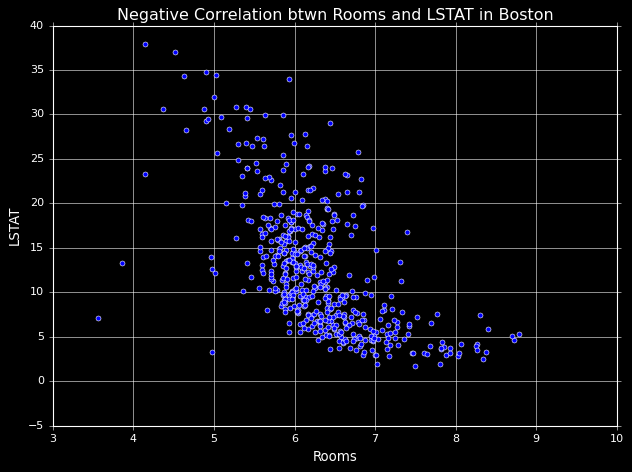

In [55]:
fig, ax = plt.subplots()

ax.scatter(boston_df.RM, boston_df.LSTAT)
ax.set_xlabel('Rooms')
ax.set_ylabel('LSTAT')
ax.set_title('Negative Correlation btwn Rooms and LSTAT in Boston')

plt.tight_layout()

We can also change [color](https://matplotlib.org/3.1.0/gallery/color/named_colors.html), opacity, marker size, and [marker symbol](https://matplotlib.org/3.2.1/api/markers_api.html).

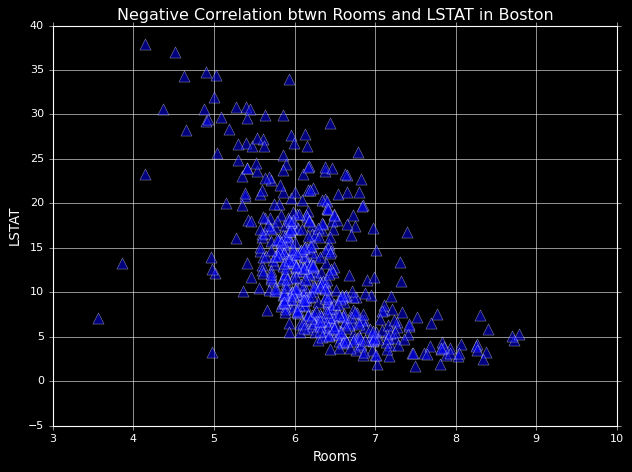

In [56]:
fig, ax = plt.subplots()

ax.scatter(x=boston_df.RM, y=boston_df.LSTAT,
            c='blue',
            alpha=0.5,
            s=100,
            marker='^')

ax.set_xlabel('Rooms')
ax.set_ylabel('LSTAT')
ax.set_title('Negative Correlation btwn Rooms and LSTAT in Boston')


plt.tight_layout()

We can also identify colors by hexadecimal code, one each for the amount of red, green, and blue. Values range from '00' to 'ff'.

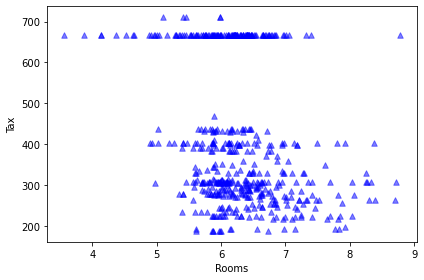

In [9]:
fig, ax = plt.subplots()

ax.scatter(x=boston_df.RM, y=boston_df.TAX,
            c='#0000ff',
            alpha=0.5,
            s=30,
            marker='^')

ax.set_xlabel('Rooms')
ax.set_ylabel('Tax')

plt.tight_layout()

#### Line Plot

Tracks the change of a single variable over time.  They are generally better than bar graphs over shorter periods of time.

Here is some code to read in some well worn shampoo sales data over a three year period.

In [10]:
shampoo = pd.read_csv('data/sales-of-shampoo-over-a-three-ye.csv')[:-1]

shampoo

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


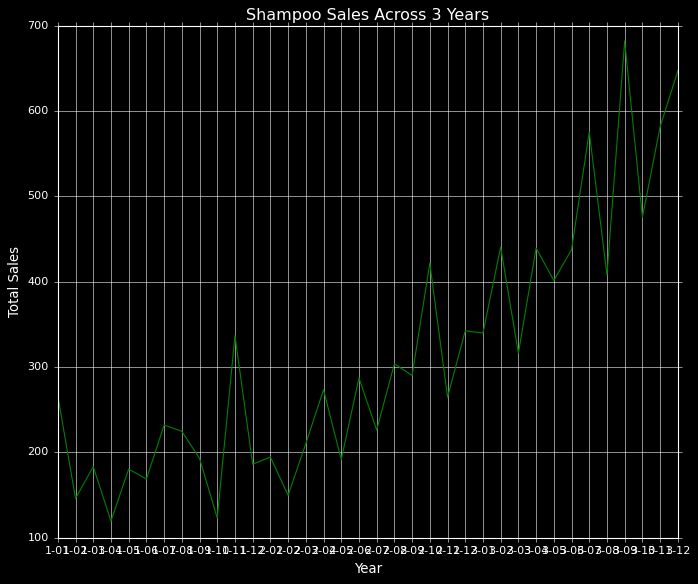

In [57]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

The xticks are illegible in the plot above.

One way to combat that is to try [rotating](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html) the ticks.

While we're at it, let's also change the [linestyle](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html).

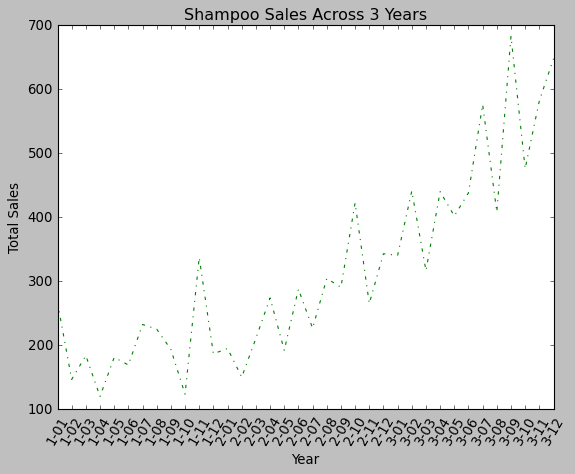

In [50]:
fig, ax = plt.subplots()

ax.plot(shampoo['Month'],
         shampoo['Sales of shampoo over a three year period'],
         color='g', linestyle='dashdot')
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.xticks(shampoo['Month'],
                   rotation=60);

Maybe better is to make custom ticks:

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

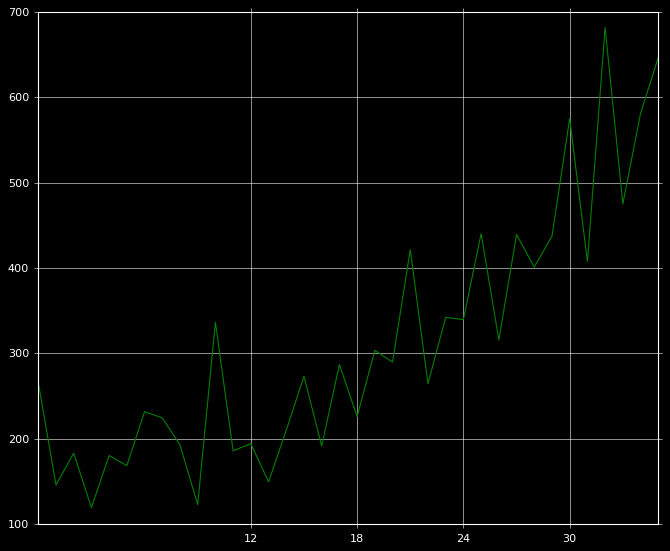

In [59]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.plot(shampoo.index,
        shampoo['Sales of shampoo over a three year period'],
        color='g')
plt.xticks(range(12, 36, 6), labels=['year_1', 'year_2', 'year_3'])
ax.set_title('Shampoo Sales Across 3 Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales');

#### Histograms

We will get get further into histograms in Phase 2, but it is good to get familiar with them sooner rather than later. 

Histograms create uniform bins across the entire range of a continuous variable. They then count the number of data points which fall into each bin.  

Histograms are often confused with bar charts, since they look somewhat similar.  The big difference, however, is that histograms visualize the distribution of a continuous variable, rather than the discrete variable shown by barcharts. You can remember this because the bins of histograms don't have spaces between them.

![histogram_ex](images/histogram_example.svg)

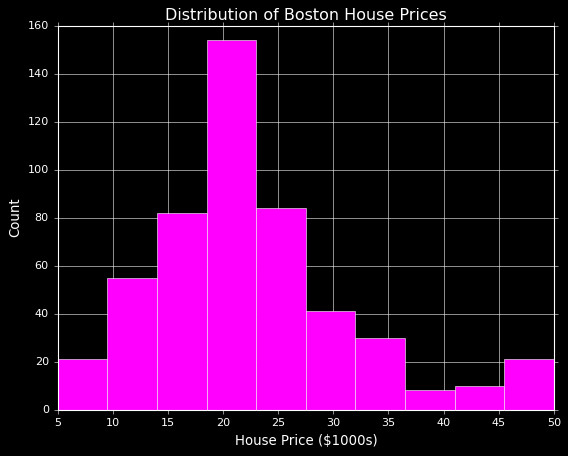

In [60]:
# Here is a histogram of sales prices from the Boston Housing Dataset

boston = load_boston()
sales_price = boston['target']

fig, ax = plt.subplots()
ax.hist(sales_price, color='magenta')
ax.set_xlabel('House Price ($1000s)');
ax.set_ylabel('Count')
ax.set_title('Distribution of Boston House Prices');

If we want to add multiple plots on one axis, we can simply call the plotting functions one after the other.

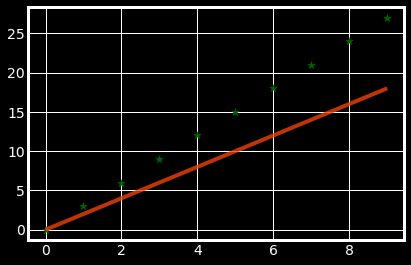

In [30]:
fig, ax = plt.subplots()

X = range(10)

Y1 = [2*x for x in X]
Y2 = [3*x for x in X]

ax.plot(X, Y1, c='#ef4209', alpha=0.8)
ax.scatter(X, Y2, c='darkgreen', marker='*', s=60);

### But why *Subplots*?

Sometimes we want multiple plots to be a part of the same figure.

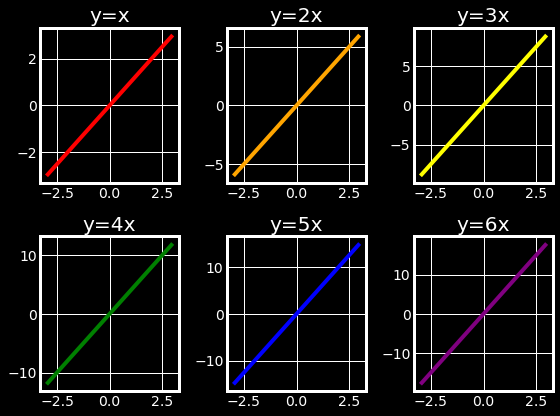

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# The above line gives me a figure with six subplots,
# arranged in two rows of three.


Ys = [[j*x for x in X] for j in range(1, 7)]

ax[0, 0].plot(X, Ys[0], c='red')
ax[0, 0].set_title('y=x')

ax[0, 1].plot(X, Ys[1], c='orange')
ax[0, 1].set_title('y=2x')

ax[0, 2].plot(X, Ys[2], c='yellow')
ax[0, 2].set_title('y=3x')

ax[1, 0].plot(X, Ys[3], c='green')
ax[1, 0].set_title('y=4x')

ax[1, 1].plot(X, Ys[4], c='blue')
ax[1, 1].set_title('y=5x')

ax[1, 2].plot(X, Ys[5], c='purple')
ax[1, 2].set_title('y=6x')

plt.tight_layout()

### Style Sheets

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

### Adding Text

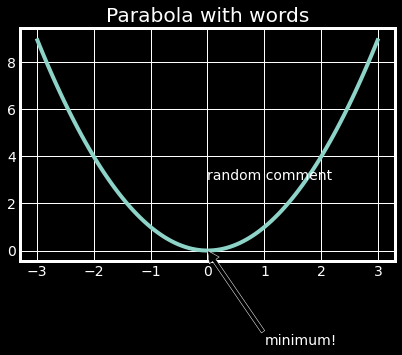

In [37]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

### Saving your figures

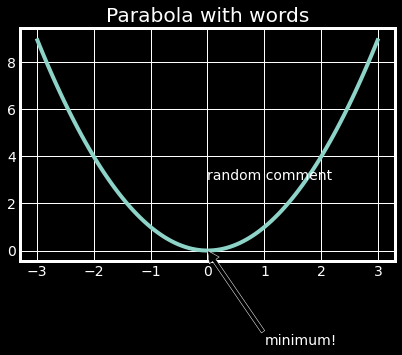

In [39]:
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

# Let's save it!
plt.savefig('images/parabola.png')

Let's make sure the image has been saved!

In [40]:
!dir images

 Volume in drive C has no label.
 Volume Serial Number is BA1D-57C2

 Directory of C:\Users\User\Documents\Flatiron\nyc-dc-ds-020121\Phase_1\data_visualization\images

02/04/2021  01:22 PM    <DIR>          .
02/04/2021  01:22 PM    <DIR>          ..
02/04/2021  01:22 PM            69,907 boxplot.png
02/04/2021  01:22 PM             5,952 histogram_example.svg
02/04/2021  01:22 PM           137,063 iris_virginica.jpg
02/04/2021  01:22 PM           106,436 matplotlib_anatomy.png
02/04/2021  02:26 PM            20,012 parabola.png
02/04/2021  01:22 PM           342,514 pie-chart-misleading.png
02/04/2021  01:22 PM            33,398 shampoo_sales_lineplot.svg
02/04/2021  01:22 PM            77,305 usa-today-2.png
               8 File(s)        792,587 bytes
               2 Dir(s)  536,313,671,680 bytes free


## Seaborn

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

[List of Graphing Methods for Seaborn](https://seaborn.pydata.org/api.html#relational-api)

Seaborn is a wrapper around matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [ ]:
# The `style` parameter can be set equal to
# 'white', 'dark', 'whitegrid', 'darkgrid', or
# 'ticks'

sns.set(style='whitegrid')
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y);

### Scatter Plot

In [ ]:
fig, ax = plt.subplots()

x, y = np.random.randn(2, 300)

# With Seaborn we can still use the subplots syntax by passing our
# axis object into the graphing function

sns.scatterplot(x, y, ax=ax)
ax.set_ylabel('Cars')
ax.set_xlabel('Number of Office Chairs');

### Violin Plot

In [ ]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.violinplot(data=tips, x="day", y="total_bill");

### Kernel Density Estimation Plot

In [ ]:
sample = stats.norm.rvs(size=200)

sns.kdeplot(sample);

In [ ]:
sns.kdeplot(sample, bw=0.1);

In [ ]:
sns.kdeplot(sample, bw=0.01, kernel='epa');

In [ ]:
sns.distplot(sample);

### Seaborn Datasets

In [ ]:
sns.get_dataset_names()

In [ ]:
ans = sns.load_dataset('anscombe')
ans.head()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ans['x'], ans['y'], c=ans['dataset'].map({'I': 1,
                                                     'II': 2,
                                                     'III': 3,
                                                     'IV': 4}));